In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../'))
sys.path.insert(0, os.path.abspath('../../'))
sys.path.insert(0, os.path.abspath('../../../'))
sys.path.insert(0, os.path.abspath('../../../../'))

In [13]:
import qiskit
provider = qiskit.IBMQ.load_account()
#provider = qiskit.IBMQ.get_provider(hub='ibm-q-unibw', group='reservations', project='reservations')


ibmqfactory.load_account:WARNING:2021-10-22 13:10:18,814: Credentials are already in use. The existing account in the session will be replaced.


In [14]:
qiskit.IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-unibw', group='reservations', project='reservations')>,
 <AccountProvider for IBMQ(hub='ibm-q-unibw', group='hochschule-muc', project='masterarbeit')>]

In [15]:
provider = qiskit.IBMQ.get_provider(hub='ibm-q-unibw', group='reservations', project='reservations')


In [17]:
provider.backends()

[<IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-unibw', group='reservations', project='reservations')>,
 <IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-unibw', group='reservations', project='reservations')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q-unibw', group='reservations', project='reservations')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q-unibw', group='reservations', project='reservations')>]

In [18]:
import numpy as np

#import qiskit
#provider = qiskit.IBMQ.load_account()
#provider = qiskit.IBMQ.get_provider(hub='ibm-q-unibw', group='reservations', project='reservations')
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import QAOA
from shared.QiskitMaxcut import *
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
provider

<AccountProvider for IBMQ(hub='ibm-q-unibw', group='reservations', project='reservations')>

graph_05_06_02


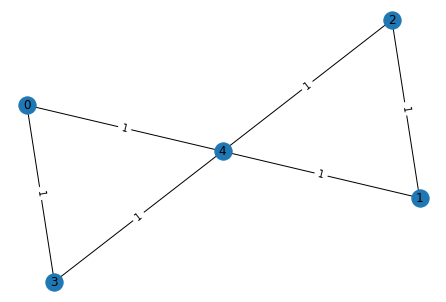

In [20]:
graph = generate_butterfly_graph(with_weights=False)
max_cut = Maxcut(graph)
max_cut_qubo = max_cut.to_qubo()
print(graph.name)
max_cut.draw()

In [21]:
step_size = 0.1
a_gamma = np.arange(0, np.pi, step_size)
b_beta = np.arange(0, np.pi, step_size)

In [22]:
a_gamma, b_beta = np.meshgrid(a_gamma, b_beta)
len(a_gamma)

32

In [23]:
def maxcut_obj(x, G):
    """
    Given a bitstring as a solution, this function returns
    the number of edges shared between the two partitions
    of the graph.
    
    Args:
        x: str
           solution bitstring
           
        G: networkx graph
        
    Returns:
        obj: float
             Objective
    """
    obj = 0
    for i,j,w in graph.edges.data('weight'):
        if x[i] != x[j]:
            obj -= w
            
    return obj


def compute_expectation(counts, G):
    
    """
    Computes expectation value based on measurement results
    
    Args:
        counts: dict
                key as bitstring, val as count
           
        G: networkx graph
        
    Returns:
        avg: float
             expectation value
    """
    
    avg = 0
    sum_count = 0
    for bitstring, count in counts.items():
        
        obj = maxcut_obj(bitstring, G)
        avg += obj * count
        sum_count += count
        
    return avg/sum_count

In [24]:
quantum_instance = QuantumInstance(
                    backend=provider.get_backend('ibmq_toronto'),
                    shots=1024)

qaoa = QAOA(
            optimizer=COBYLA(maxiter=0),
            quantum_instance=quantum_instance,
            reps=1
            )

op, offset = max_cut_qubo.to_ising()

In [25]:
def create_cirucit(gamma,beta):
    circuits = qaoa.construct_circuit([gamma,beta], operator=op)
    circuit = circuits[0]
    circuit.measure_all()
    return circuit

In [26]:
landscape = np.zeros(a_gamma.shape)

for i in range(0, len(landscape)):
    circuits = []
    for j in range(0, len(landscape)):
        # create circuits for entire row 
        circuit = create_cirucit(a_gamma[i][j], b_beta[i][j])
        circuits.append(circuit)
    
    # create one job with circuits 
    job_name = f"{graph.name}_row_{i}"
    job = quantum_instance.execute(circuits)
    #job.update_name(job_name)
    print(job_name)
    #print(job)
    
    # add results to landscape 
    k = 0
    for count in job.get_counts():
        mean = compute_expectation(count, graph)
        landscape[i,k % 32] = mean
        k += 1

FAILURE: Job id: 61729c877c5dd5cb00fd3a3e encounters the error. Error is : Failed to run job.. Error code: 5203.. Re-submit the circuits.
FAILURE: Job id: 6172c12078399c2a99505200 encounters the error. Error is : Failed to run job.. Error code: 5203.. Re-submit the circuits.
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: For

FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job

FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job

FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job

FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job

FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job

FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job

FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job

FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job

FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job

FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job

FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job

Process ForkProcess-63554:
Process ForkProcess-63665:
Process ForkProcess-63609:
Process ForkProcess-63558:
Process ForkProcess-63599:
Process ForkProcess-63573:
Process ForkProcess-63650:
Process ForkProcess-63588:
Process ForkProcess-63681:
Process ForkProcess-63581:
Process ForkProcess-63610:
Process ForkProcess-63711:
Process ForkProcess-63557:
Process ForkProcess-63579:
Process ForkProcess-63655:
Process ForkProcess-63664:
Process ForkProcess-63656:
Process ForkProcess-63619:
Process ForkProcess-63643:
Process ForkProcess-63642:
Traceback (most recent call last):
Process ForkProcess-63578:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (mo

  File "/usr/lib64/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 315, in _bootstrap
  

  File "/usr/lib64/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.8/mul

  File "/usr/lib64/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.8/mul

  File "/usr/lib64/python3.8/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(block=True)
  File "/usr/lib64/python3.8/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(block=True)
  File "/usr/lib64/python3.8/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(block=True)
  File "/usr/lib64/python3.8/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(block=True)
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.8/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(block=True)
  File "/usr/lib64/python3.8/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(block=True)
  File "/usr/lib64/python3.8/concurrent/futures/process.py", line 233, in _proces

  File "/usr/lib64/python3.8/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(block=True)
  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 97, in get
    res = self._recv_bytes()
  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  Fil

  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/usr/lib64/python3.8/multiprocessing/queue

  File "/usr/lib64/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib64/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib64/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib64/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib64/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib64/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib64/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib64/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib64/python3.8/mul

KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib64/python3.8/multiprocessing/connection.py", line 383, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib64/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
KeyboardInterrupt
  File "/usr/lib64/python3.8/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(block=True)
  File "/usr/lib64/python3.8/multiprocessing/qu

FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job: '403 Client Error: Forbidden for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-unibw/Groups/reservations/Projects/reservations/Jobs. The queue is disabled., Error code: 3245.'" 
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: "Error submitting job

KeyboardInterrupt: 

In [ ]:
print(landscape)
plt.matshow(landscape)
plt.show()

In [ ]:
# Mean of landscape
np.mean(landscape)

In [ ]:
# Minimium 
np.min(landscape)

In [ ]:
# Display Coordinates of Minimum 
np.unravel_index(np.argmin(landscape), landscape.shape)

In [ ]:
# Gamma and beta value of Minimium
gamma, beta = np.unravel_index(np.argmin(landscape), landscape.shape)
opt_gamma = gamma * step_size
opt_beta = beta * step_size
print(f"Opt.Gamma: {opt_gamma}, Opt.Beta: {opt_beta}")

In [ ]:
# Save result matrix 
with open('landscape_creation_qc_toronto_butterfly_no_weights_results.npy', 'wb') as f:
    np.save(f, landscape)

In [ ]:
import plotly.graph_objects as go

In [ ]:
# Plot landscape in 3D 
fig = go.Figure(data=go.Surface(z=landscape, x=a_gamma, y=b_beta))

fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor='limegreen', project_z=True))


fig.update_layout(title="QAOA - MaxCut-Landscape", scene=dict(
    xaxis_title="γ",
    yaxis_title="β",
    zaxis_title="F(γ,β)"
))

In [ ]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm

font_size = 14
fig, ax = plt.subplots(1,1, figsize=(5,5))

cmap = cm.get_cmap('viridis')
minv = np.min([landscape])
maxv = np.max([landscape])
normalizer=Normalize(minv,maxv)
im=cm.ScalarMappable(norm=normalizer)

plot = ax.contourf(a_gamma, b_beta, landscape, cmap = cmap, norm=normalizer)
ax.set_ylabel(r'$\beta$', fontsize = font_size)
ax.set_xlabel(r'$\gamma$', fontsize = font_size)
ax.set_title('Simulation with Noise Model', fontsize = font_size)

colorbar = plt.colorbar(im, ax=ax)
colorbar.ax.set_ylabel('Energies', fontsize = font_size)
plt.show()